In [8]:
# ==============================
# Statistics and Trends
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# Load Dataset
# ------------------------------
#load animal data set
df = pd.read_csv("data.csv")

print("First 5 rows of dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

First 5 rows of dataset:
   anime_id                         title  score  rank  popularity  members  \
0     28977                      Gintama°   9.05     8         347   680037   
1     57555  Chainsaw Man Movie: Reze-hen   9.18     2         962   282129   
2     11061        Hunter x Hunter (2011)   9.03     9           8  3107455   
3     52991             Sousou no Frieren   9.29     1         121  1269074   
4      9969                      Gintama'   9.02    11         406   601940   

                                            synopsis  start_date    end_date  \
0  Gintoki, Shinpachi, and Kagura return as the f...  2015-01-01  2016-01-01   
1                           Sequel to Chainsaw Man .  2025-01-01  2025-01-01   
2  Hunters devote themselves to accomplishing haz...  2011-01-01  2014-01-01   
3  During their decade-long quest to defeat the D...  2023-01-01  2024-01-01   
4  After a one-year hiatus, Shinpachi Shimura ret...  2011-01-01  2012-01-01   

    type  episodes 

In [15]:
df_clean = df.dropna(subset=["synopsis", "start_date", "end_date", "episodes"])
print(df_clean.isnull().sum())

anime_id      0
title         0
score         0
rank          0
popularity    0
members       0
synopsis      0
start_date    0
end_date      0
type          0
episodes      0
image_url     0
dtype: int64


In [11]:
def scatter_plot(df, x_col, y_col):
    """
    Creates a relational scatter plot between two numerical variables.

    Parameters:
    df (DataFrame): Cleaned pandas DataFrame
    x_col (str): Column name for x-axis
    y_col (str): Column name for y-axis

    Returns:
    None
    """
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title("Relational Plot: Scatter Plot")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

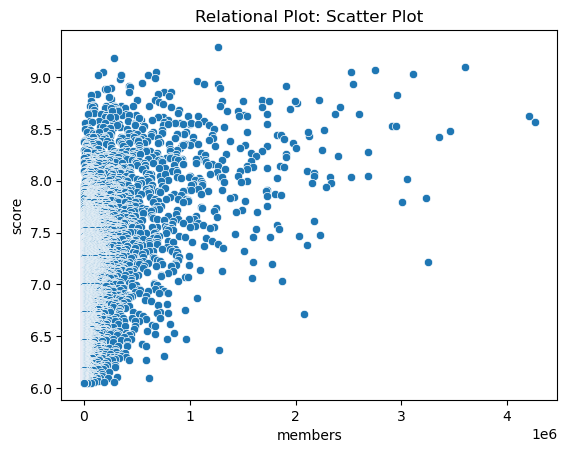

In [12]:
scatter_plot(df_clean, "members", "score")

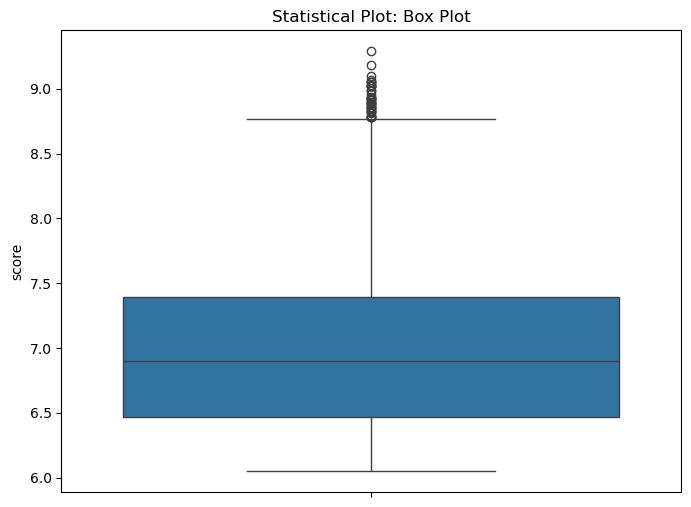

In [21]:


def box_plot(df, column):
    """
    Create a box plot to visualize statistical distribution and outliers.

    Parameters:
        df (DataFrame): Cleaned pandas DataFrame
        column (str): Numerical column name

    Returns:
        None
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column])
    plt.title("Statistical Plot: Box Plot")
    plt.ylabel(column)
    plt.show()


# Example usage
box_plot(df_clean, "score")


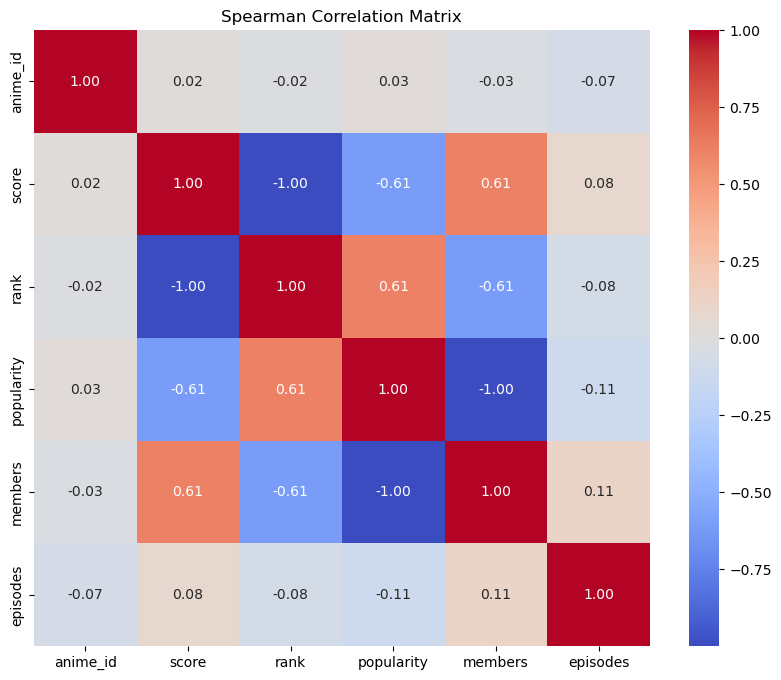

,anime_id,score,rank,popularity,members,episodes
anime_id,1.000000,0.022892,-0.022863,0.028110,-0.028146,-0.066753
score,0.022892,1.000000,-0.999986,-0.613406,0.613397,0.075254
rank,-0.022863,-0.999986,1.000000,0.613501,-0.613492,-0.075216
popularity,0.028110,-0.613406,0.613501,1.000000,-1.000000,-0.111652
members,-0.028146,0.613397,-0.613492,-1.000000,1.000000,0.111599
episodes,-0.066753,0.075254,-0.075216,-0.111652,0.111599,1.000000


In [20]:
def correlation_matrix(df, method='spearman'):
    """
    Compute and plot the correlation matrix for numerical columns.

    Parameters:
        df (DataFrame): Cleaned pandas DataFrame
        method (str): Correlation method - 'pearson', 'spearman', 'kendall'

    Returns:
        DataFrame: Correlation matrix
    """
    corr = df.corr(method=method, numeric_only=True)

    # Plotting the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        square=True
    )
    plt.title(f'{method.capitalize()} Correlation Matrix')
    plt.show()

    return corr
# Example usage
correlation_matrix(df_clean, method='spearman')
